# 다중 숫자 순차열 데이터 단일 예측 Template


# 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 기반 숫자열 생성

In [2]:
numbers = np.zeros((2000,2))
numbers[:,0] = np.sin(np.arange(0,1000,0.5))
numbers[:,1] = np.cos(np.arange(0,1000,0.5))

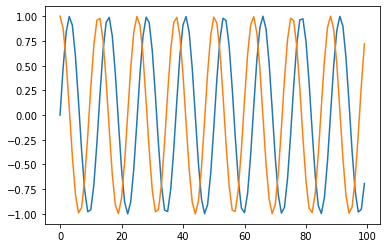

In [3]:
plt.plot(numbers[:100,0])
plt.plot(numbers[:100,1])
plt.show()

In [4]:
SEQUENCE_LENGTH = 5
OFFSET = 1

## 입출력 데이터 생성

[12345678901234567890, 34567890123456789012]의 숫자열 2개로 다음의 입출력 데이터를 생성한다.
```
[12345, 34567] -> 6
[23456, 45678] -> 7
[34567, 56789] -> 8
...
[56789, 78901] -> 0
```

In [5]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append([numbers[i+SEQUENCE_LENGTH+OFFSET-1,0]])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x0>   = [3:8] = 45678
#                      y  = [8]   = 9
# numbers[1] = 34567890123456789012
#                 i = 3
#                 <-x1>   = [3:8] = 67890



In [6]:
print(len(raw_x))
# len(raw_x) = 1994 = len(numbers) - SEQUENCE_LENGTH - OFFSET = 2000 - 5 - 1

1994


## 데이터를 2차원 벡터화 하기

RNN은 2차원 입력을 전제로 한다. 다중 숫자열은 그 자체로 2차원 데이터이다. 따로 해줄 것은 없다.


In [7]:
print(raw_x[0])
print(raw_y[0])

[[ 0.          1.        ]
 [ 0.47942554  0.87758256]
 [ 0.84147098  0.54030231]
 [ 0.99749499  0.0707372 ]
 [ 0.90929743 -0.41614684]]
[0.5984721441039565]


In [8]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

split_at = int(len(x)*0.9)
(train_x, test_x) = x[:split_at], x[split_at:]
(train_y, test_y) = y[:split_at], y[split_at:]

print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1994, 5, 2)
(1994, 1)
Training Data:
(1794, 5, 2)
(1794, 1)
Test Data:
(200, 5, 2)
(200, 1)


준비된 데이터는 다음과 같습니다.

train_x[0]
 [[ 0.          1.        ]
 [ 0.47942554  0.87758256]
 [ 0.84147098  0.54030231]
 [ 0.99749499  0.0707372 ]
 [ 0.90929743 -0.41614684]]

train_y[0]
 [0.59847214]


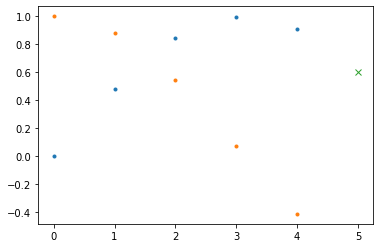

In [9]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.')
plt.plot(train_x[0].T[1], '.')
plt.plot([len(train_x[0])], train_y[0], 'x')

plt.show()

# Template

## LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               67072     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 67,201
Trainable params: 67,201
Non-trainable params: 0
_________________________________________________________________


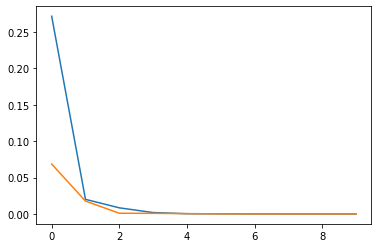

7/7 [==============================] - 0s 5ms/step - loss: 4.5107e-06 - mape: 0.5341
loss= 4.510743110586191e-06
mape= 0.5341074466705322


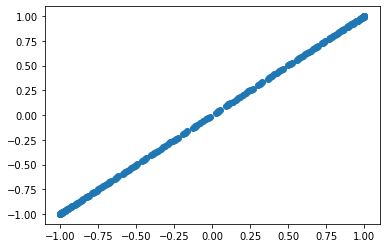

In [10]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## GRU

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50688     
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 50,817
Trainable params: 50,817
Non-trainable params: 0
_________________________________________________________________


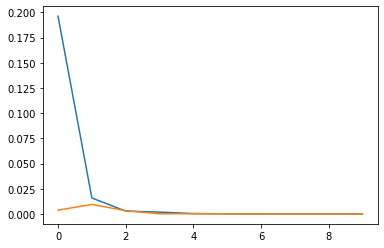

7/7 [==============================] - 0s 3ms/step - loss: 2.9662e-07 - mape: 0.1144
loss= 2.9661964617844205e-07
mape= 0.11436667293310165


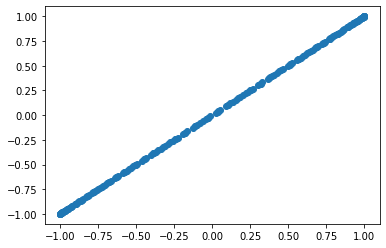

In [11]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(GRU(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## Bidirectional + LSTM

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 256)               134144    
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 134,401
Trainable params: 134,401
Non-trainable params: 0
_________________________________________________________________


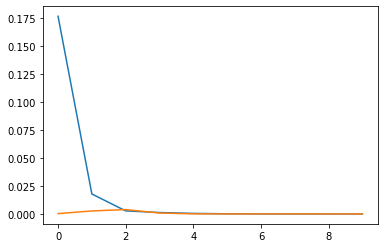

7/7 [==============================] - 0s 4ms/step - loss: 7.3918e-07 - mape: 0.1356
loss= 7.391795975308924e-07
mape= 0.13564524054527283


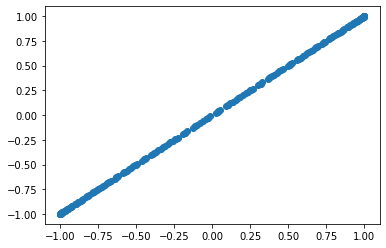

In [12]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Bidirectional(LSTM(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## Bidirectional + GRU

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               101376    
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 101,633
Trainable params: 101,633
Non-trainable params: 0
_________________________________________________________________


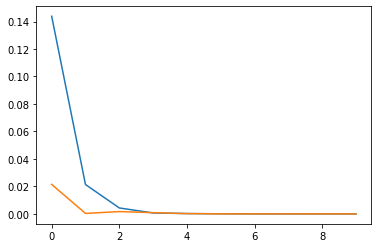

7/7 [==============================] - 0s 3ms/step - loss: 2.2139e-07 - mape: 0.1229
loss= 2.2138691235795704e-07
mape= 0.12290873378515244


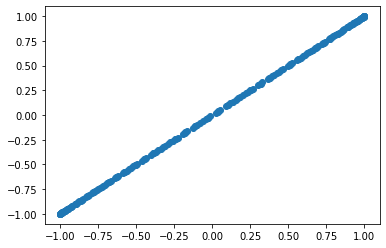

In [13]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Bidirectional(GRU(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## stacked

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 128)            67072     
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 198,785
Trainable params: 198,785
Non-trainable params: 0
_________________________________________________________________


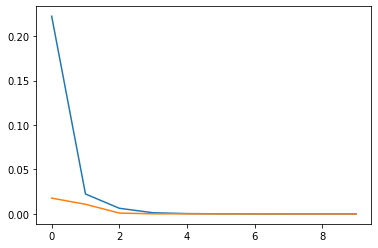

7/7 [==============================] - 0s 4ms/step - loss: 5.6286e-06 - mape: 0.4710
loss= 5.628617145703174e-06
mape= 0.47097328305244446


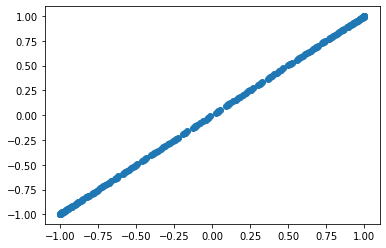

In [14]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## CNN

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 32)             224       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 32)             3104      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2, 32)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2, 32)             3104      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2, 32)             3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)               

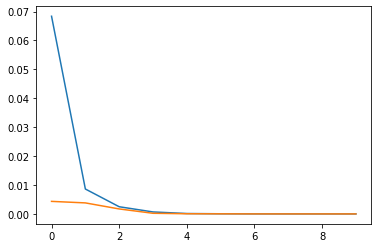

7/7 [==============================] - 0s 8ms/step - loss: 5.0193e-06 - mape: 0.5242
loss= 5.019274340156699e-06
mape= 0.5242493152618408


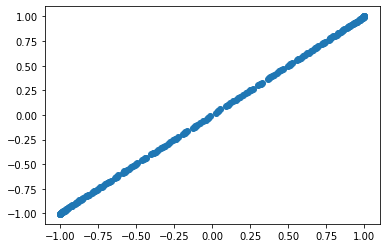

In [15]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()

## CNN + LSTM

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 5, 32)             224       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 5, 32)             3104      
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               82432     
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 85,889
Trainable params: 85,889
Non-trainable params: 0
_________________________________________________________________


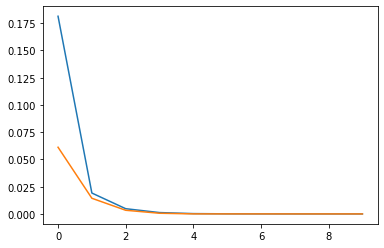

7/7 [==============================] - 0s 3ms/step - loss: 1.0596e-05 - mape: 0.9493
loss= 1.0596358151815366e-05
mape= 0.9493200778961182


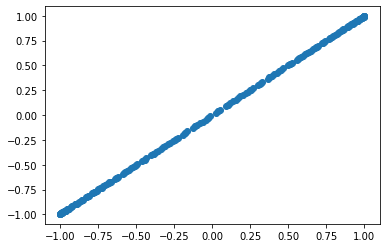

In [16]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = train_x.shape[1:]
# input_shape = (5,2)

model = keras.Sequential()
model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=0, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x)
plt.scatter(test_y, y_)
plt.show()